In [244]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
! pip install pandas-ta
import pandas_ta as ta

In [276]:
START = "2023-09-01"
END = "2024-09-01"
ticker = "QQQ"

# spy = yf.Ticker("SPY")

stock_df = yf.download(ticker, start=START, end=END)
stock_df = stock_df.xs(ticker, level='Ticker', axis=1)


stock_df['time_published'] = stock_df.index
stock_df['time_published'] = pd.to_datetime(stock_df['time_published'])
stock_df['time_published'] = stock_df['time_published'].dt.date
display(stock_df)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,time_published
Date,,,,,,,
2023-09-01,374.475830,377.589996,380.829987,376.079987,380.399994,39772400,2023-09-01
2023-09-05,374.951874,378.070007,379.309998,375.829987,376.769989,32344200,2023-09-05
2023-09-06,371.649353,374.739990,377.630005,372.700012,377.279999,42998700,2023-09-06
2023-09-07,368.991455,372.059998,372.850006,369.149994,370.209991,52060700,2023-09-07
2023-09-08,369.507141,372.579987,374.850006,371.600006,372.010010,35800100,2023-09-08
...,...,...,...,...,...,...,...
2024-08-26,474.672974,475.339996,480.380005,473.239990,479.450012,27452600,2024-08-26
2024-08-27,476.090973,476.760010,477.839996,471.709991,473.690002,27510000,2024-08-27
2024-08-28,470.688568,471.350006,477.019989,467.890015,476.290009,37372400,2024-08-28


In [277]:
#Adding indicators
stock_df['RSI']=ta.rsi(stock_df.Close, length=15)
stock_df['EMAF']=ta.ema(stock_df.Close, length=20)
stock_df['EMAM']=ta.ema(stock_df.Close, length=100)
stock_df['EMAS']=ta.ema(stock_df.Close, length=150)

stock_df['Target'] = stock_df['Adj Close']-stock_df.Open
stock_df['Target'] = stock_df['Target'].shift(-1)

stock_df['TargetClass'] = [1 if stock_df.Target[i]>0 else 0 for i in range(len(stock_df))]

stock_df['TargetNextClose'] = stock_df['Adj Close'].shift(-1)

stock_df.dropna(inplace=True)
stock_df.reset_index(inplace = True)
stock_df.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

# stock_df_set = stock_df.iloc[:, 0:11]#.values
# pd.set_option('display.max_columns', None)
display(stock_df)

<ipython-input-277-b79a5ea5bf82>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_df['TargetClass'] = [1 if stock_df.Target[i]>0 else 0 for i in range(len(stock_df))]


Price,Adj Close,High,Low,Open,time_published,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,439.283508,442.500000,439.200012,441.410004,2024-04-08,51.596656,440.755223,417.497347,400.447800,-2.051361,0,440.908630
1,440.908630,443.239990,437.440002,442.959991,2024-04-09,53.440418,440.895679,417.987102,401.001207,0.060181,1,437.060181
2,437.060181,439.239990,436.279999,437.000000,2024-04-10,48.730694,440.655138,418.390724,401.496157,3.779236,1,444.039246
3,444.039246,446.329987,437.959991,440.260010,2024-04-11,56.226364,441.104172,418.924967,402.077268,-4.139557,0,436.960449
4,436.960449,442.239990,436.880005,441.100006,2024-04-12,48.517730,440.834250,419.308037,402.556642,-12.287994,0,429.772003
...,...,...,...,...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,2024-08-23,57.185291,469.173497,458.761032,446.519201,-4.777039,0,474.672974
97,474.672974,480.380005,473.239990,479.450012,2024-08-26,53.957366,469.760782,459.089328,446.900934,2.400970,1,476.090973
98,476.090973,477.839996,471.709991,473.690002,2024-08-27,54.790544,470.427375,459.439242,447.296418,-5.601440,0,470.688568
99,470.688568,477.019989,467.890015,476.290009,2024-08-28,51.021758,470.515245,459.675099,447.615009,-3.280457,0,469.999542


In [278]:
news_df = pd.read_csv('technology_news_data_50Daily.csv')
news_df['time_published'] = pd.to_datetime(news_df['time_published'])
news_df['time_published'] = news_df['time_published'].dt.date
news_df = news_df[news_df['title'] != 'Before you continue']


df1 = stock_df.copy(deep=True)
df2 = news_df[['time_published', 'source', 'overall_sentiment_score']]
average_sentiment_df = df2.groupby(['time_published', 'source'], as_index=False)['overall_sentiment_score'].mean()
average_sentiment_df.rename(columns={'overall_sentiment_score': 'average sentiment score'}, inplace=True)
pivot_df = average_sentiment_df.pivot(index='time_published', columns='source', values='average sentiment score')
pivot_df.reset_index(inplace=True)
pivot_df.fillna(-1, inplace=True)
pivot_df.replace(-1, np.nan, inplace=True)
combined_df = pd.merge(df1, pivot_df, on='time_published', how='inner')
# # combined_df['time_published'] = pd.to_datetime(combined_df['time_published'])
# # combined_df['time_published'] = (combined_df['time_published'] - pd.to_datetime('1970-01-01')).dt.days
# df_encoded = pd.get_dummies(combined_df, columns=['source'])
# display(df_encoded)
display(combined_df)

,Adj Close,High,Low,Open,time_published,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose,Al Jareeza,Associated Press,Barrons,Benzinga,Business Insider,Business Standard,CNBC,CNN,Canada Newswire,Cointelegraph,Decrypt.co,Financial News London,Financial Times,Forbes,Fox Business News,GlobeNewswire,Investing News Network,Investor Ideas,Investors Business Daily,Kiplinger,MarketWatch,Money Control,Money Morning,Motley Fool,New York Times,PR Newswire,PennyStocks.com,Reuters,South China Morning Post,StockMarket.com,Stocknews.com,The Atlantic,The Economist,The Financial Express,The Street,The Week News,UPI Business,Wall Street Journal,Zacks Commentary
0,439.283508,442.500000,439.200012,441.410004,2024-04-08,51.596656,440.755223,417.497347,400.447800,-2.051361,0,440.908630,NaN,NaN,NaN,0.103171,0.182876,NaN,0.256322,0.047593,NaN,0.162014,NaN,NaN,NaN,0.061233,0.318206,0.123460,NaN,NaN,0.202369,NaN,NaN,0.012076,NaN,0.304409,NaN,0.220255,NaN,NaN,0.033336,NaN,NaN,-0.033848,NaN,NaN,NaN,NaN,NaN,NaN,0.209103
1,440.908630,443.239990,437.440002,442.959991,2024-04-09,53.440418,440.895679,417.987102,401.001207,0.060181,1,437.060181,NaN,-0.031581,NaN,0.267301,0.177943,NaN,NaN,-0.020835,0.403993,0.143970,-0.045746,NaN,NaN,0.158955,0.032111,0.115736,NaN,NaN,0.055548,NaN,NaN,0.130222,NaN,0.204497,NaN,0.404966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193731
2,437.060181,439.239990,436.279999,437.000000,2024-04-10,48.730694,440.655138,418.390724,401.496157,3.779236,1,444.039246,NaN,0.055890,NaN,0.182556,0.033111,NaN,NaN,-0.020894,NaN,NaN,NaN,NaN,NaN,0.132751,NaN,0.161709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.352193,NaN,NaN,NaN,NaN,NaN,0.241548,NaN,0.173894,NaN,NaN,NaN,NaN,0.163428
3,444.039246,446.329987,437.959991,440.260010,2024-04-11,56.226364,441.104172,418.924967,402.077268,-4.139557,0,436.960449,NaN,-0.216174,NaN,0.189119,NaN,NaN,0.084168,0.013055,0.091346,NaN,NaN,NaN,NaN,0.121310,NaN,0.090305,NaN,NaN,0.205168,NaN,NaN,NaN,NaN,0.159242,NaN,0.234550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200163
4,436.960449,442.239990,436.880005,441.100006,2024-04-12,48.517730,440.834250,419.308037,402.556642,-12.287994,0,429.772003,NaN,-0.004818,0.269007,0.201153,0.153252,NaN,NaN,NaN,0.161976,NaN,NaN,NaN,NaN,0.111187,NaN,0.170038,0.15306,NaN,0.128234,NaN,NaN,NaN,NaN,NaN,NaN,0.177232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259303,NaN,NaN,NaN,NaN,0.163071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,2024-08-23,57.185291,469.173497,458.761032,446.519201,-4.777039,0,474.672974,NaN,NaN,NaN,0.241693,NaN,NaN,NaN,NaN,NaN,0.161351,0.078378,NaN,NaN,NaN,NaN,0.177836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258131,NaN,NaN,NaN,NaN,0.037809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248688
97,474.672974,480.380005,473.239990,479.450012,2024-08-26,53.957366,469.760782,459.089328,446.900934,2.400970,1,476.090973,NaN,NaN,NaN,0.195866,NaN,NaN,0.125910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119941,NaN,NaN,NaN,NaN,NaN,NaN,0.019780,0.215400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169621
98,476.090973,477.839996,471.709991,473.690002,2024-08-27,54.790544,470.427375,459.439242,447.296418,-5.601440,0,470.688568,NaN,NaN,NaN,0.190242,NaN,NaN,0.077878,NaN,NaN,0.150800,NaN,NaN,NaN,NaN,NaN,0.192094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176734
99,470.688568,477.019989,467.890015,476.290009,2024-08-28,51.021758,470.515245,459.675099,447.615009,-3.280457,0,469.999542,NaN,NaN,NaN,0.215394,NaN,NaN,0.243668,NaN,NaN,NaN,-0.173025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142919,0.226838,NaN,NaN,NaN,NaN,0.151303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170518


In [280]:
# List of columns representing sentiment scores
news_sentiment_columns = [
    'Al Jareeza', 'Associated Press', 'Barrons', 'Benzinga', 'Business Insider',
    'Business Standard', 'CNBC', 'CNN', 'Canada Newswire', 'Cointelegraph',
    'Decrypt.co', 'Financial News London', 'Financial Times', 'Forbes',
    'Fox Business News', 'GlobeNewswire', 'Investing News Network',
    'Investor Ideas', 'Investors Business Daily', 'Kiplinger', 'MarketWatch',
    'Money Control', 'Money Morning', 'Motley Fool', 'New York Times',
    'PR Newswire', 'PennyStocks.com', 'Reuters', 'South China Morning Post',
    'StockMarket.com', 'Stocknews.com', 'The Atlantic', 'The Economist',
    'The Financial Express', 'The Street', 'The Week News', 'UPI Business',
    'Wall Street Journal', 'Zacks Commentary'
]

# Calculate the mean sentiment across all news sources
combined_df['aggregate_sentiment_mean'] = combined_df[news_sentiment_columns].mean(axis=1)

# Calculate other possible aggregation metrics (optional)
combined_df['aggregate_sentiment_median'] = combined_df[news_sentiment_columns].median(axis=1)
combined_df['aggregate_sentiment_std'] = combined_df[news_sentiment_columns].std(axis=1)

# Fill missing values with 0 before aggregation
combined_df[news_sentiment_columns] = combined_df[news_sentiment_columns].fillna(0)

# Recalculate the mean sentiment
combined_df['aggregate_sentiment_mean'] = combined_df[news_sentiment_columns].mean(axis=1)

# print(combined_df[['time_published', 'aggregate_sentiment_mean']].head())
final_df = combined_df[['Adj Close', 'High', 'Low', 'Open', 'aggregate_sentiment_mean', 'aggregate_sentiment_median', 'aggregate_sentiment_std', 'Target', 'TargetClass', 'TargetNextClose']]
time_published = combined_df['time_published'].values
# final_df = combined_df[['Adj Close', 'High', 'Low', 'Open', 'Target', 'TargetClass', 'TargetNextClose']]


data_set = final_df.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

display(final_df)

,Adj Close,High,Low,Open,aggregate_sentiment_mean,aggregate_sentiment_median,aggregate_sentiment_std,Target,TargetClass,TargetNextClose
0,439.283508,442.500000,439.200012,441.410004,0.056476,0.0,0.097659,-2.051361,0,440.908630
1,440.908630,443.239990,437.440002,442.959991,0.056175,0.0,0.111283,0.060181,1,437.060181
2,437.060181,439.239990,436.279999,437.000000,0.037851,0.0,0.083542,3.779236,1,444.039246
3,444.039246,446.329987,437.959991,440.260010,0.030058,0.0,0.080828,-4.139557,0,436.960449
4,436.960449,442.239990,436.880005,441.100006,0.049813,0.0,0.084634,-12.287994,0,429.772003
...,...,...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,0.030869,0.0,0.075212,-4.777039,0,474.672974
97,474.672974,480.380005,473.239990,479.450012,0.021706,0.0,0.057534,2.400970,1,476.090973
98,476.090973,477.839996,471.709991,473.690002,0.020199,0.0,0.055541,-5.601440,0,470.688568
99,470.688568,477.019989,467.890015,476.290009,0.025067,0.0,0.078648,-3.280457,0,469.999542


In [281]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
# data_set_scaled = sc.fit_transform(data_set)
# print(data_set_scaled)
data_set = data_set.to_numpy()

In [282]:
# multiple feature from data provided to the model
X = []
corresponding_times = []
backcandles = 30
print(data_set.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set.shape[0]):#backcandles+2
        X[j].append(data_set[i-backcandles:i, j])

for i in range(backcandles, data_set.shape[0]):  # Starting from backcandles to get the correct times
  # Append the time corresponding to the last time step of each sample
  corresponding_times.append(time_published[i])
corresponding_times = np.array(corresponding_times)


#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
X, yi =np.array(X), np.array(data_set[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
# print(X)
print(X.shape)
# print(y)
print(y.shape)

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 1))
sc_y = MinMaxScaler(feature_range=(0, 1))

X_shape = X.shape
X_reshaped = X.reshape(-1, X.shape[2])

X_reshaped_scaled = sc_X.fit_transform(X_reshaped)
X = X_reshaped_scaled.reshape(X_shape[0], X_shape[1], -1)
y = sc_y.fit_transform(y)

101
(71, 30, 8)
(71, 1)


In [283]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
time_published_train, time_published_test = corresponding_times[:splitlimit], corresponding_times[splitlimit:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(sc_y.inverse_transform([y_test[-1]]), corresponding_times[-1])
# print(y_train)

56
(56, 30, 8) (15, 30, 8)
(56, 1) (15, 1)
[[475.60165405]] 2024-08-29


In [241]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

np.random.seed(506)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - loss: 0.1254 - val_loss: 0.3335
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0503 - val_loss: 0.0803
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0328 - val_loss: 0.0594
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0296 - val_loss: 0.1103
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0195 - val_loss: 0.1499
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0276 - val_loss: 0.1158
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0187 - val_loss: 0.0805
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0209 - val_loss: 0.0730
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0222 - val_loss: 0.0798
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0157 - val_loss: 0.0840
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0159 - val_loss: 0.0762
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0181 - val_loss: 0.0734

In [242]:
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on test set: {loss}")
y_pred = model.predict(X_test)
for i in range(15):
    print(y_pred[i], y_test[i])

Mean Squared Error on test set: 0.024789609014987946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
[0.26578516] [0.24358416]
[0.27373567] [0.40783081]
[0.315647] [0.4100313]
[0.33822197] [0.58146385]
[0.3793686] [0.59040924]
[0.4316883] [0.68191806]
[0.48140824] [0.66710662]
[0.49299332] [0.69995586]
[0.5025755] [0.58776954]
[0.48618594] [0.66329362]
[0.4945178] [0.59495544]
[0.48485067] [0.61577948]
[0.48684084] [0.53644241]
[0.45296347] [0.52632371]
[0.4438908] [0.60859359]


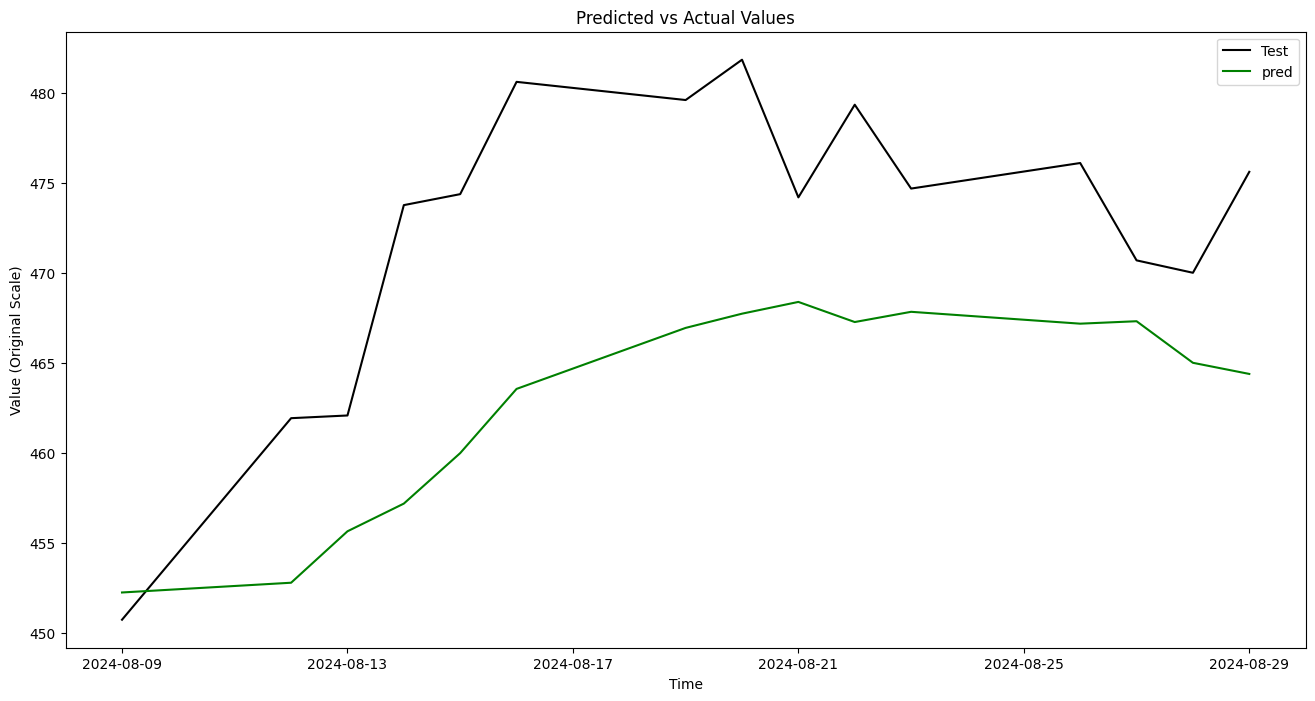

In [285]:
#Model only predicts 1 day in advance (The NextTargetClose)
y_test_original = sc_y.inverse_transform(y_test)
y_pred_original = sc_y.inverse_transform(y_pred)

plt.figure(figsize=(16,8))
plt.plot(time_published_test, y_test_original, color = 'black', label = 'Test')
plt.plot(time_published_test, y_pred_original, color = 'green', label = 'pred')
plt.xlabel('Time')
plt.ylabel('Value (Original Scale)')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()